вариант 3


In [135]:
n2 = 1.2
n1 = 1.08 
n0 = 0.096 
d2 = 2.3727 
d1 = 2.2264 
d0 = 0.9091 

n2 = 2.9
n1 = 3.19 
n0 = 0.87 
d2 = 0.7 
d1 = 0.35 
d0 = 0.05 

In [136]:
import numpy as np
import scipy.signal as signal
import control as c
import matplotlib.pyplot as plt

In [137]:
n = np.array([n2, n1, n0])
d = np.array([1, d2, d1, d0])
f = c.tf(n, d)
f

TransferFunction(array([1.2  , 1.08 , 0.096]), array([1.    , 2.3727, 2.2264, 0.9091]))

In [138]:
c.tfdata(f)

([[array([1.2  , 1.08 , 0.096])]], [[array([1.    , 2.3727, 2.2264, 0.9091])]])

In [139]:
z = c.zero(f)
p = c.pole(f)
k = c.dcgain(f)
f_ss = c.ss(f)

In [140]:
t0 = 0
t1 = 20
dt = 0.01
nt = int (t1/dt) + 1 # Number of points of sim time
t = np.linspace (t0, t1, nt)
u = 2* np.ones (nt)
# %% Simulation :
trd = c.impulse_response(f, t)
trd_ss = c.impulse_response(f_ss, t)


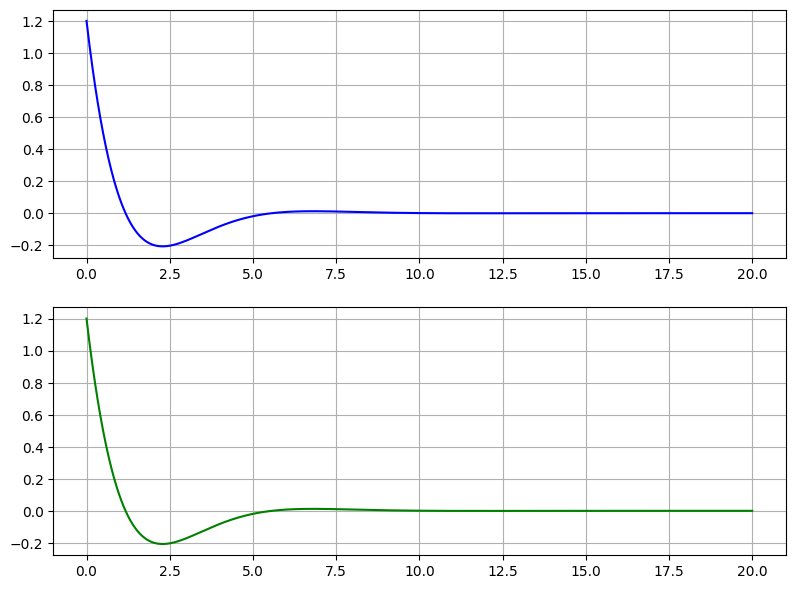

In [141]:
# %% Plotting :
plt.close ('all')
fig_width_cm = 24
fig_height_cm = 18
plt.figure (1 , figsize =( fig_width_cm /2.54 , fig_height_cm /2.54))
plt.subplot(2,1,1)
plt.plot (t ,  trd.y[0][0], 'blue')
plt.grid ()
plt.subplot(2,1,2)
plt.plot (t ,  trd_ss.y[0][0], 'green')
plt.grid ()
# params

{'RiseTime': 0.08, 'SettlingTime': 8.67, 'SettlingMin': 0.075790576568875, 'SettlingMax': 0.5549313082455639, 'Overshoot': 425.5083878396273, 'Undershoot': 0, 'Peak': 0.5549313082455639, 'PeakTime': 1.17, 'SteadyStateValue': 0.10559894401055989}
{'RiseTime': 0.08, 'SettlingTime': 8.67, 'SettlingMin': 0.075790576568875, 'SettlingMax': 0.5549313082455639, 'Overshoot': 425.50838783962774, 'Undershoot': 0, 'Peak': 0.5549313082455639, 'PeakTime': 1.17, 'SteadyStateValue': 0.10559894401055979}


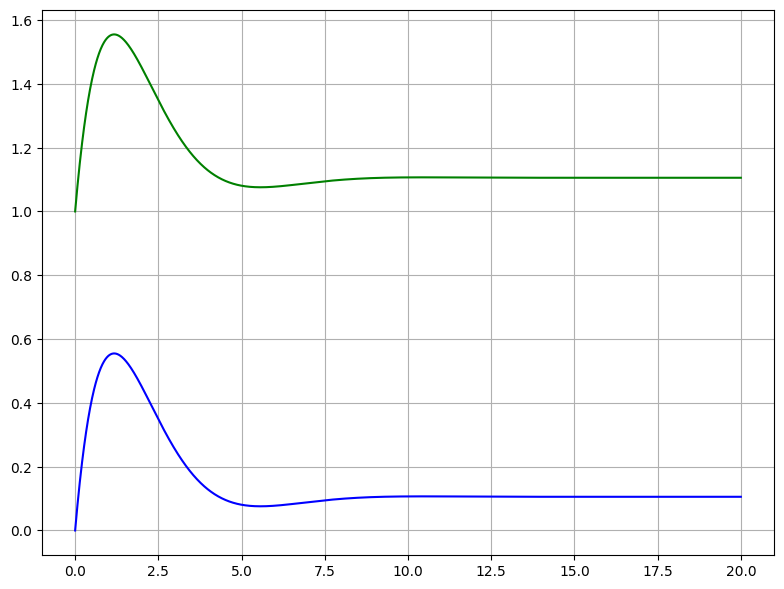

In [142]:
trd = c.step_response(f,t)
trd_ss =c.step_response(f_ss,t)
print(c.step_info(f,t))
print(c.step_info(f_ss,t))
plt.close ('all')
fig_width_cm = 24
fig_height_cm = 18
plt.figure (1 , figsize =( fig_width_cm /2.54 , fig_height_cm /2.54))
plt.plot (t ,  trd.y[0][0], 'blue')
plt.plot (t ,  trd_ss.y[0][0]+1, 'green')
plt.grid ()



In [143]:
w = np.logspace(-1,2,100)
r = c.freqresp(f, w)

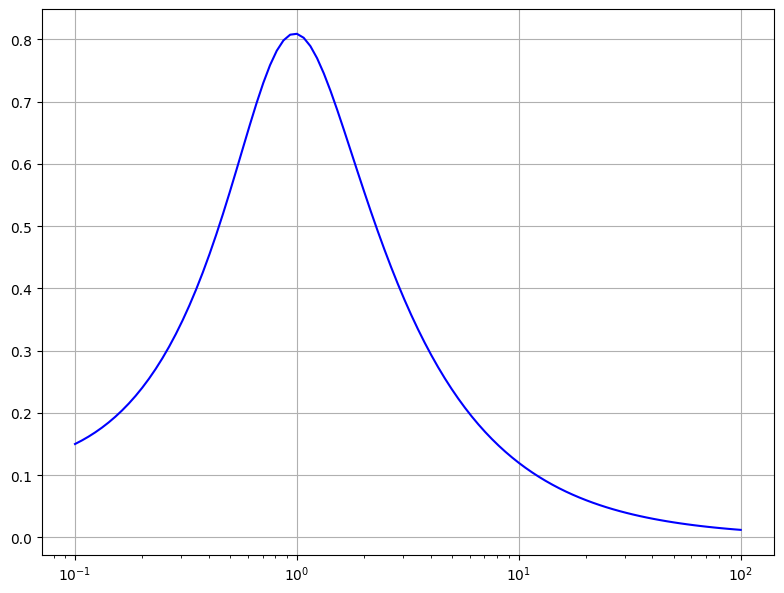

In [144]:
plt.close ('all')
fig_width_cm = 24
fig_height_cm = 18
plt.figure (1 , figsize =( fig_width_cm /2.54 , fig_height_cm /2.54))
plt.plot (w ,  r[0], 'blue')
plt.grid ()
plt.xscale('log')

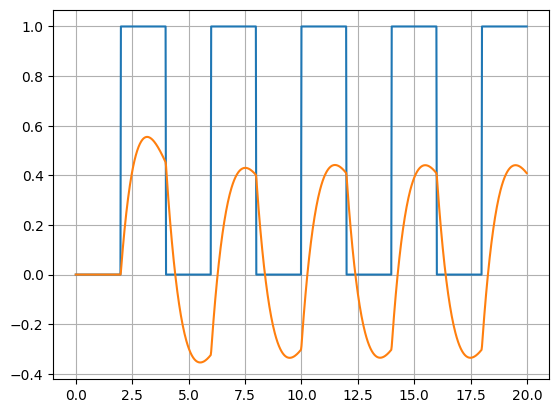

In [145]:
t = np.linspace(0, 20, 1000, endpoint=False)
u = (signal.square((2 * np.pi  * t)/4, )*-1+1)/2
trd = c.forced_response(f,t,u)
plt.plot(t, u)
plt.plot(t,trd.y[0])
plt.grid()